# Задача № 2
## Измерение радиоактивности с использованием жидкостных сцинтиляционных счетчиков (одиночная метка)
#### Выполнил студент 320 группы Чичварин Владимир

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None

Результаты измерений серий стандартных образцов изотопов 3Н и 14С по программе счета одиночной метки (для построения поправочных кривых гашения).

Для образцов с 14С (DPM14С=212000):

In [3]:
# Для образцов с 14С (DPM14С=212000):
c_14_df = pd.DataFrame.from_dict({'POS':[1,2,3,4,5,6,7,8], 'TIME':[1,1,1,1,1,1,1,1], 'CPMA':[194803,189424,183486,175058,159448,138437,109166,72652], 'SIS':[119.55,90.22,70.19,52.6,38.7,27.71,20.15,14.92], 'tSIE':[730.66,548.1,422.82,313.36,221.33,151.95,105.27,72.65]}).set_index('POS')
c_14_df

,TIME,CPMA,SIS,tSIE
POS,,,,
1,1,194803,119.55,730.66
2,1,189424,90.22,548.10
3,1,183486,70.19,422.82
4,1,175058,52.60,313.36
5,1,159448,38.70,221.33
6,1,138437,27.71,151.95
7,1,109166,20.15,105.27
8,1,72652,14.92,72.65


Для образцов с 3Н (DPM3Н=56756)

In [9]:
# Для образцов с 3Н (DPM3Н=56756)
h_3_df = pd.DataFrame.from_dict({'POS':[1,2,3,4,5,6,7,8], 'TIME':[1,1,1,1,1,1,1,1], 'CPMA':[34781,28523,17988,18051,12742,7596,5123,2451], 'SIS':[18.53,13.88,10.84,10.95,9.12,7.85,8.7,8.46], 'tSIE':[834.04,545.02,293.13,292.56,205.68,135.53,120.34,66.93]}).set_index('POS')
h_3_df

,TIME,CPMA,SIS,tSIE
POS,,,,
1,1,34781,18.53,834.04
2,1,28523,13.88,545.02
3,1,17988,10.84,293.13
4,1,18051,10.95,292.56
5,1,12742,9.12,205.68
6,1,7596,7.85,135.53
7,1,5123,8.70,120.34
8,1,2451,8.46,66.93


Таблица кривой гашения для углерода:

In [11]:
# Таблица кривой гашения для углерода:
c_gash = c_14_df[['CPMA' ]]
c_gash['E'] = round(c_14_df['CPMA'] / 212000, 2)
c_gash['tSIE'] = c_14_df['tSIE']
c_gash

,CPMA,E,tSIE
POS,,,
1,194803,0.92,730.66
2,189424,0.89,548.10
3,183486,0.87,422.82
4,175058,0.83,313.36
5,159448,0.75,221.33
6,138437,0.65,151.95
7,109166,0.51,105.27
8,72652,0.34,72.65


Таблица кривой гашения для водорода:

In [12]:
# Таблица кривой гашения для водорода:
h_gash = h_3_df[['CPMA' ]]
h_gash['E'] = round(h_3_df['CPMA'] / 56756, 2)
h_gash['tSIE'] = h_3_df['tSIE']
h_gash

,CPMA,E,tSIE
POS,,,
1,34781,0.61,834.04
2,28523,0.50,545.02
3,17988,0.32,293.13
4,18051,0.32,292.56
5,12742,0.22,205.68
6,7596,0.13,135.53
7,5123,0.09,120.34
8,2451,0.04,66.93


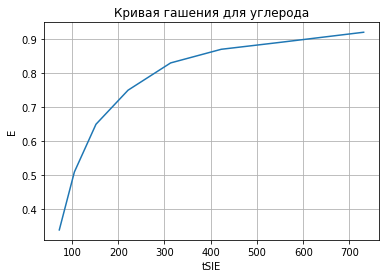

In [13]:
fig, ax = plt.subplots()
plt.plot(c_gash['tSIE'], c_gash['E'])
plt.title('Кривая гашения для углерода')
plt.xlabel('tSIE')
plt.ylabel('E')
plt.grid()
plt.show()

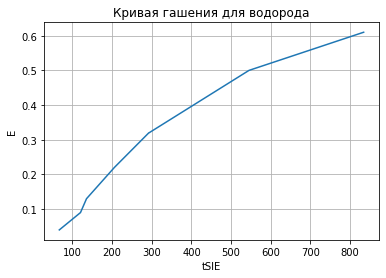

In [14]:
fig, ax = plt.subplots()
plt.plot(h_gash['tSIE'], h_gash['E'])
plt.title('Кривая гашения для водорода')
plt.xlabel('tSIE')
plt.ylabel('E')
plt.grid()
plt.show()

In [72]:
# Данные для проб, содержащие одиночную метку 3H, с разной степенью гашения:
X = np.array(h_gash['tSIE']).reshape(-1,1)
model = make_pipeline(PolynomialFeatures(0), LinearRegression())
model.fit(X, h_gash['E'])
table_h = pd.DataFrame.from_dict({'POS':[1,2,3,4], 'CPMA':[6927,6818,8670,8981], 'tSIE':[317.58, 318.18, 449.21, 450.12]}).set_index('POS')
table_h['E'] =  model.predict(np.array(table_h['tSIE']).reshape(-1,1))#reg.predict(poly.transform(np.array(table_h['tSIE']).reshape(-1,1)))
test = model.predict(np.array(h_gash['tSIE']).reshape(-1,1))
table_h['DPM'] = table_h['CPMA'] / table_h['E']
round(table_h, 2)

,CPMA,tSIE,E,DPM
POS,,,,
1,6927,317.58,0.28,24850.22
2,6818,318.18,0.28,24459.19
3,8670,449.21,0.28,31103.14
4,8981,450.12,0.28,32218.83


In [73]:
h_gash['test'] = test
h_gash

,CPMA,E,tSIE,test
POS,,,,
1,34781,0.61,834.04,0.27875
2,28523,0.50,545.02,0.27875
3,17988,0.32,293.13,0.27875
4,18051,0.32,292.56,0.27875
5,12742,0.22,205.68,0.27875
6,7596,0.13,135.53,0.27875
7,5123,0.09,120.34,0.27875
8,2451,0.04,66.93,0.27875


In [71]:
h_gash.to_excel('poly.xlsx')

DPM среднее по 3H:

In [18]:
# DPM среднее по 3H:
round(table_h['DPM'].mean(),2)

20024.4

Данные для проб, содержащие одиночную метку 14C, с разной степенью гашения:

In [48]:
# Данные для проб, содержащие одиночную метку 14C, с разной степенью гашения:
X = np.array(c_gash['tSIE']).reshape(-1,1)
model = make_pipeline(PolynomialFeatures(3), Ridge())
model.fit(X, c_gash['E'])
table_c = pd.DataFrame.from_dict({'POS':[1,2,3,4], 'CPMA':[5797,5801,6173,6205], 'tSIE':[313.02,314.27,449.21,450.12]}).set_index('POS')
table_c['E'] = model.predict(np.array(table_c['tSIE']).reshape(-1,1))
table_c['DPM'] = table_c['CPMA'] / table_c['E'] 
round(table_c,2)

/home/iastre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.75525e-18): result may not be accurate.
  overwrite_a=True).T


,CPMA,tSIE,E,DPM
POS,,,,
1,5797,313.02,0.85,6807.98
2,5801,314.27,0.85,6806.47
3,6173,449.21,0.88,7012.15
4,6205,450.12,0.88,7049.04


DPM среднее по 14C:

In [17]:
# DPM среднее по 14C:
round(table_c['DPM'].mean(),2)

6918.91

* Влияет ли гашение на величину истинной активности? Нет, согласно учебнику истиная активность - это количество распадов в минуту, гашение же -снижение доли энергии, преобразуемой во вспышку, регистрируемую прибором
* Влияет ли гашение на величину относительной активности? Да, согласно учебнику относительная активность - это количество зарегистрированных распадов в минуту

In [19]:
# Перевод в беккерели - поскольку мы узнали число произошедших распадов и время было равно минуте:
c_bek = table_c['DPM'] / 60 
c_kur = c_bek / (3.7 * 10 ** 4)
h_bek = table_h['DPM'] / 60
h_kur = h_bek / (3.7 * 10 ** 4)

Активность углерода в беккерелях:

In [20]:
# Активность углерода в беккерелях:
round(pd.DataFrame(c_bek),2).rename(columns={'DPM':'Беккерели'})

,Беккерели
POS,
1,113.47
2,113.44
3,116.87
4,117.48


Активность углерода в микрокюри:

In [21]:
# Активность углерода в микрокюри:
pd.DataFrame(c_kur).rename(columns={'DPM':'Микрокюри'})

,Микрокюри
POS,
1,0.003067
2,0.003066
3,0.003159
4,0.003175


Активность водорода в беккерелях:

In [22]:
# Активность водорода в беккерелях:
round(pd.DataFrame(h_bek),2).rename(columns={'DPM':'Беккерели'})

,Беккерели
POS,
1,340.41
2,334.50
3,324.44
4,335.61


Активность водорода в микрокюри:

In [23]:
# Активность водорода в микрокюри:
pd.DataFrame(h_kur).rename(columns={'DPM':'Микрокюри'})

,Микрокюри
POS,
1,0.009200
2,0.009041
3,0.008769
4,0.009070


# Задача № 3
## Измерение радиоактивности с использованием жидкостных сцинтилляционных счетчиков (двойная метка)

In [24]:
obsh_df = pd.DataFrame.from_dict({'#':[1,2,3,4,5,6,7,8,9,10,11,12,13,14], 'Count Time':[1,1,1,1,1,1,1,1,1,1,1,1,1,1], 'CPMA':[10417,9476,6784,4761,3475,2288,1109,1507,2190,3286,3894,4384,11953,11838], 'CPMB':[266,139,112,90,57,32,4501,4319,3212,2194,1609,529,5349,5322], 'tSIE':[677.39,503.17,321.57,219.49,166.39,116.01,681.31,509.31,318.97,200.4,164.74,114.37,320.57,317.18]}).set_index('#')
obsh_df

,Count Time,CPMA,CPMB,tSIE
#,,,,
1,1,10417,266,677.39
2,1,9476,139,503.17
3,1,6784,112,321.57
4,1,4761,90,219.49
5,1,3475,57,166.39
6,1,2288,32,116.01
7,1,1109,4501,681.31
8,1,1507,4319,509.31
9,1,2190,3212,318.97


Пробы 1-12 приготовлены для построения калибровочных кривых гашения. Пробы 1-6 содержат только 3H пробы 7-12 содержат только 14C.   
DPM3H = 20150   
DPM14C = 6239   
Пробы 13,14 -пробы, содержащие двойную метку, в которых надо определить активность 3H и 14С

Таблица для построения калибровочной кривой по 3H:

In [25]:
# Таблица для построения калибровочной кривой по 3H:
h_table = obsh_df[['CPMA']][0:6]
h_table['E1'] = h_table['CPMA'] / 20150 # эффективность в первом окне
h_table['CPMB'] = obsh_df['CPMB'][0:6]
h_table['E2'] = h_table['CPMB'] / 20150 # во втором
h_table['tSIE'] = obsh_df['tSIE'][0:6]
round(h_table,2)

,CPMA,E1,CPMB,E2,tSIE
#,,,,,
1,10417,0.52,266,0.01,677.39
2,9476,0.47,139,0.01,503.17
3,6784,0.34,112,0.01,321.57
4,4761,0.24,90,0.00,219.49
5,3475,0.17,57,0.00,166.39
6,2288,0.11,32,0.00,116.01


Таблица для построения калибровочной кривой по 14C:

In [26]:
# Таблица для построения калибровочной кривой по 14C:
c_table = obsh_df[['CPMA']][6:12]
c_table['E1'] = round(c_table['CPMA'] / 6239, 2)
c_table['CPMB'] = obsh_df['CPMB'][6:12]
c_table['E2'] = round(c_table['CPMB'] / 6239, 2)
c_table['tSIE'] = obsh_df['tSIE'][6:12]
round(c_table,2)

,CPMA,E1,CPMB,E2,tSIE
#,,,,,
7,1109,0.18,4501,0.72,681.31
8,1507,0.24,4319,0.69,509.31
9,2190,0.35,3212,0.51,318.97
10,3286,0.53,2194,0.35,200.40
11,3894,0.62,1609,0.26,164.74
12,4384,0.70,529,0.08,114.37


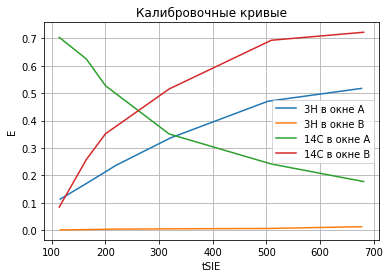

In [20]:
fig, ax = plt.subplots()
plt.plot(h_table['tSIE'], h_table['E1'])
plt.plot(h_table['tSIE'], h_table['E2'])
plt.plot(c_table['tSIE'], c_table['E1'])
plt.plot(c_table['tSIE'], c_table['E2'])
plt.xlabel('tSIE')
plt.ylabel('E')
plt.grid()
plt.legend(['3H в окне A', '3H в окне B', '14C в окне A', '14C в окне B'])
plt.title('Калибровочные кривые')
plt.show()

Данные для проб с двойной отметкой:

In [27]:
# Данные для проб с двойной отметкой:
fin_df = obsh_df[['CPMA', 'CPMB', 'tSIE']][12:]
X = np.array(h_table['tSIE']).reshape(-1,1)
model = make_pipeline(PolynomialFeatures(3), Ridge())
model.fit(X, h_table['E1'])
fin_df['E 3H A'] = model.predict(np.array(fin_df['tSIE']).reshape(-1,1))
X = np.array(c_table['tSIE']).reshape(-1,1)
model = make_pipeline(PolynomialFeatures(3), Ridge())
model.fit(X, c_table['E1'])
fin_df['E 14C A'] = model.predict(np.array(fin_df['tSIE']).reshape(-1,1))
model = make_pipeline(PolynomialFeatures(3), Ridge())
model.fit(X, c_table['E2'])
fin_df['E 14C B'] = model.predict(np.array(fin_df['tSIE']).reshape(-1,1))
round(fin_df,2)

/home/iastre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.34295e-17): result may not be accurate.
  overwrite_a=True).T
/home/iastre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.28353e-17): result may not be accurate.
  overwrite_a=True).T
/home/iastre/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.28353e-17): result may not be accurate.
  overwrite_a=True).T


,CPMA,CPMB,tSIE,E 3H A,E 14C A,E 14C B
#,,,,,,
13,11953,5349,320.57,0.34,0.36,0.54
14,11838,5322,317.18,0.33,0.37,0.53


Истинная активность 14C:

In [28]:
# Истинная активность 14C:
dpmc = fin_df['CPMB'] / fin_df['E 14C B']
round(pd.DataFrame(dpmc).rename(columns={0:'dpmc'}),2)

,dpmc
#,
13,9919.76
14,9948.85


Скорость счета 14 C:

In [29]:
# Скорость счета 14 C:
cpmc14ca = dpmc * fin_df['E 14C A']
round(pd.DataFrame(cpmc14ca), 2)

,0
#,
13,3585.34
14,3631.92


Скорость счета 3H в 3H-канале:

In [30]:
# Скорость счета 3H в 3H-канале:
cpm3ha = fin_df['CPMA'] - cpmc14ca
round(pd.DataFrame(cpm3ha),2)

,0
#,
13,8367.66
14,8206.08


Истинная активность 3H:

In [31]:
# Истинная активность 3H:
dpmh = cpm3ha / fin_df['E 3H A']
round(pd.DataFrame(dpmh),2)

,0
#,
13,24847.65
14,24597.48


Истинное значение 14c в бекеррелях:

In [32]:
# Истинное значение 14c в бекеррелях:
round(pd.DataFrame(dpmc/60).rename(columns={0:'Бекеррели'}),2)

,Бекеррели
#,
13,165.33
14,165.81


Истинное значение 14c в микрокюри:

In [33]:
# Истинное значение 14c в микрокюри:
pd.DataFrame((dpmc/60) / (3.7 * 10 ** 4)).rename(columns={0:'Микрокюри'})

,Микрокюри
#,
13,0.004468
14,0.004481


Истинное значение 3H в бекеррелях:

In [34]:
# Истинное значение 3H в бекеррелях:
round(pd.DataFrame(dpmh/60).rename(columns={0:'Бекеррели'}),2)

,Бекеррели
#,
13,414.13
14,409.96


Истинное значение 3H в микрокюри:

In [35]:
# Истинное значение 3H в микрокюри:
pd.DataFrame((dpmh/60) / (3.7 * 10 ** 4)).rename(columns={0:'Микрокюри'})

,Микрокюри
#,
13,0.011193
14,0.011080


1) 2 изотопа в одной пробе можно определить только если в одном из окон в одной из серий экспериментов присутствие одного из изотопов было бы статистически незначительным

2) Это происходит из-за специфической настройки окон